In [1]:
import numpy as np
import matplotlib.pyplot as plt

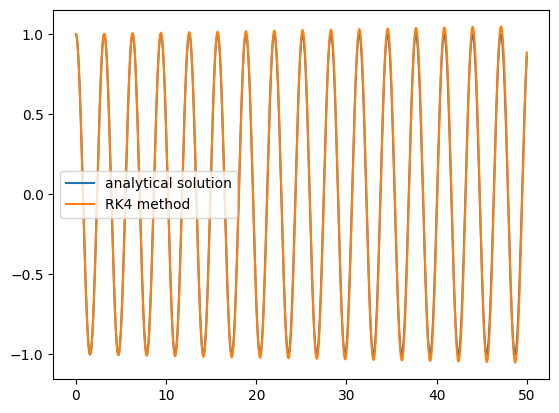

0.0006684438020751495


In [19]:
# x'' + w^2 = 0
# g = - w^2x
h = 0.0005
upper_bound = 50
t = np.arange(0, upper_bound, h)
x = np.zeros(len(t))
v = np.zeros(len(t))
x_0 = 1
v_0 = 0
w = 2
x[0] = x_0
v[0] = v_0
for i in range(0, int(upper_bound/h)-1):
    k1 = h*v[i]
    k2 = h*(v[i] + k1/2)
    k3 = h*(v[i] + k2/2)
    k4 = h*(v[i] + k3)
    k1_ = -h* w**2 * x[i] 
    k2_ = -h* w**2 * (x[i] + k1_/2)
    k3_ = -h* w**2 * (x[i] + k2_/2)
    k4_ = -h* w**2 * (x[i] + k3_)
    x[i+1] = x[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    v[i+1] = v[i] + (1/6) * (k1_ + 2*k2_ + 2*k3_ + k4_)
x_a = np.cos(2*t)
plt.plot(t, x_a, label="analytical solution")
plt.plot(t, x, label="RK4 method")
plt.legend()
plt.show()
l2_error = np.sum((x_a - x)**2)/len(x)
print(l2_error)


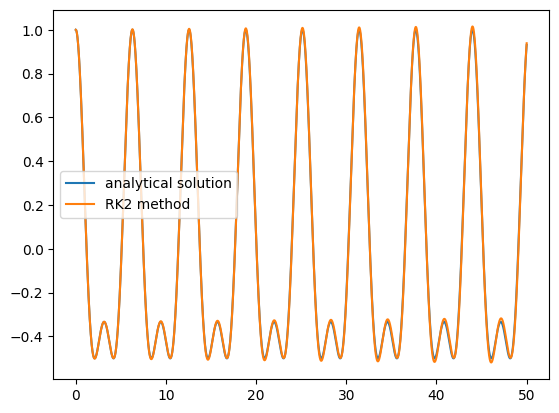

7.420557129421191e-05


In [20]:
# x'' + wd^2x = Fcos(wft)
# x'' = Fcos(wft) - wd^2x
h = 0.0005
upper_bound = 50
t = np.arange(0, upper_bound, h)
x = np.zeros(len(t))
v = np.zeros(len(t))
x_0 = 1
v_0 = 0
x[0] = x_0
v[0] = v_0
wd = 2
wf = 1
F = 2
for i in range(0, int(upper_bound/h)-1):
    k1 = h*v[i]
    k2 = h*(v[i] + k1/2)
    k3 = h*(v[i] + k2/2)
    k4 = h*(v[i] + k3)
    k1_ =  h*F*np.cos(wf*(t[i]+h/2)) -h* w**2 * x[i] 
    k2_ =  h*F*np.cos(wf*(t[i]+h/2)) -h* w**2 * (x[i] + k1_/2)
    k3_ =  h*F*np.cos(wf*(t[i]+h/2)) -h* w**2 * (x[i] + k2_/2)
    k4_ =  h*F*np.cos(wf*(t[i]+h/2)) -h* w**2 * (x[i] + k3_)
    x[i+1] = x[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    v[i+1] = v[i] + (1/6) * (k1_ + 2*k2_ + 2*k3_ + k4_)

x_a = (1/3) * np.cos(2*t) + (2/3) * np.cos(t)
plt.plot(t, x_a, label="analytical solution")
plt.plot(t, x, label="RK2 method")
plt.legend()
plt.show()
l2_error = np.sum((x_a - x)**2)/len(x)
print(l2_error)